In [2]:
###understand various things of David's package through experimentation, 

In [3]:
#directories that would be using 
WLD = '/Users/Ismael/code/lensing/WeakLensingDeblending/'
repo = '/Users/Ismael/code/lensing/repo/'

In [4]:
%matplotlib inline
import os 
os.chdir(WLD)
import matplotlib.pyplot as plt

### Understanding fits files structure. 

In [22]:
%%bash
#produces demo.fits file with partials, 
./simulate.py --catalog-name OneDegSq.fits --image-width 512 --image-height 512 \
--survey-name LSST --filter-band i --output-name demo --verbose --calculate_bias

Read 858502 catalog entries from OneDegSq.fits
Simulating LSST i-band survey with {'exposure_time': 6900.0, 'sky_brightness': 20.0, 'mirror_diameter': 8.36, 'airmass': 1.2, 'zero_point': 41.5, 'survey_name': 'LSST', 'image_width': 512, 'filter_band': 'i', 'pixel_scale': 0.2, 'atmospheric_psf_beta': 0.0, 'cosmic_shear_g2': 0.0, 'zenith_psf_fwhm': 0.67, 'image_height': 512, 'effective_area': 33.212, 'extinction': 0.07, 'atmospheric_psf_e1': 0.0, 'cosmic_shear_g1': 0.0, 'atmospheric_psf_e2': 0.0} (obs.frac. = 0.628)
Will render all pixels with at least 33.5 detected electrons.
PSF dilution factor is 0.049718.
Simulation output will be saved to demo.fits
doing something different. for dx,dx
doing something different. for dy,dy
doing something different. for ds,ds
doing something different. for dg1,dg1
doing something different. for dg2,dg2
doing something different. for dx,dx
doing something different. for dy,dy
doing something different. for ds,ds
doing something different. for dg1,dg1
do


  file: demo.fits
  extension: 0
  type: IMAGE_HDU
  image info:
    data type: f4
    dims: [512,512]


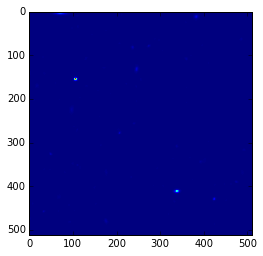


  file: demo.fits
  extension: 2
  type: IMAGE_HDU
  image info:
    data type: f8
    dims: [21,12,12]


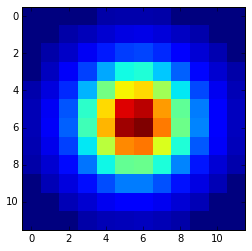


  file: demo.fits
  extension: 2
  type: IMAGE_HDU
  image info:
    data type: f8
    dims: [21,12,12]


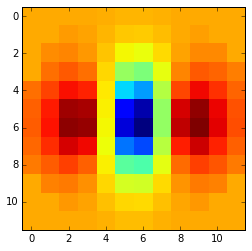


  file: demo.fits
  extension: 4
  type: IMAGE_HDU
  image info:
    data type: f8
    dims: [21,8,9]


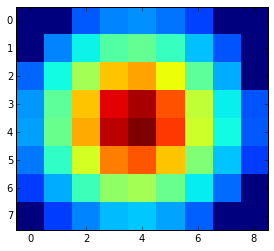

In [6]:
import fitsio
fits = fitsio.FITS('demo.fits')
#  # simulated survey image
# print fits[1] # analysis results
# print fits[1]['z'][1]


#all galaxies, simulated survey image 
print fits[0]
img = fits[0][:,:] #notice to get 512x512 image we do this
img = fits[0].read() #can also do this. 
plt.imshow(img)
plt.show()

#notice this again has 6 in first dimension (image + 5 partials) but the pixel size can vary.
print fits[2]
img = fits[2][:,:,:][0]
img = fits[2].read()[0]
plt.imshow(img)
plt.show()


#obtain first partial
print fits[2]
img = fits[2].read()[6]
plt.imshow(img)
plt.show()



#the first slicing [:,:,:] gets the datacube matrix from the file which at this point always includes
#the galaxy and 6 partials, then accessing each with [1] gets you the particular image of 8x9 pixels.
#in this case. 
print fits[4]
img = fits[4][:,:,:][0] 
plt.imshow(img)
plt.show()



In [27]:
fits[1]


  file: demo.fits
  extension: 1
  type: BINARY_TBL
  rows: 726
  column info:
    db_id               i8  
    grp_id              i8  
    grp_size            i2  
    grp_rank            i2  
    visible             i2  
    xmin                i4  
    xmax                i4  
    ymin                i4  
    ymax                i4  
    f_disk              f4  
    f_bulge             f4  
    dx                  f4  
    dy                  f4  
    z                   f4  
    ab_mag              f4  
    ri_color            f4  
    flux                f4  
    sigma_m             f4  
    sigma_p             f4  
    e1                  f4  
    e2                  f4  
    a                   f4  
    b                   f4  
    beta                f4  
    psf_sigm            f4  
    purity              f4  
    snr_sky             f4  
    snr_iso             f4  
    snr_grp             f4  
    snr_isof            f4  
    snr_grpf            f4  
    ds               

0


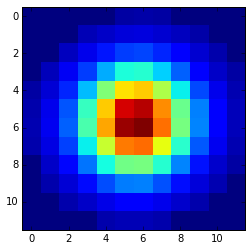

1


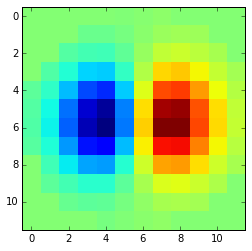

2


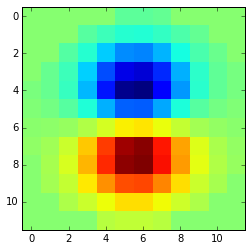

3


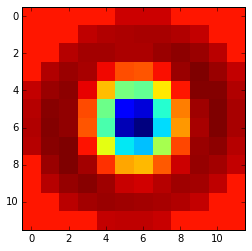

4


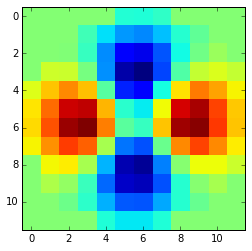

5


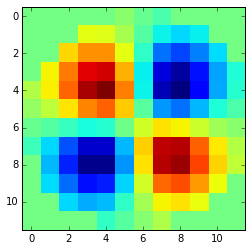

6


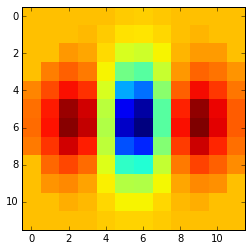

7


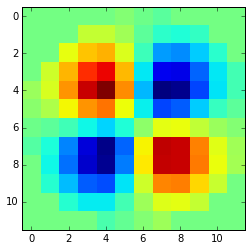

8


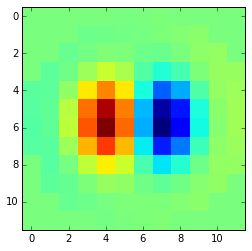

9


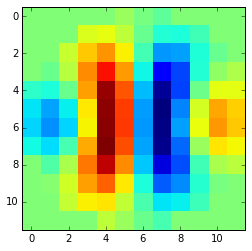

10


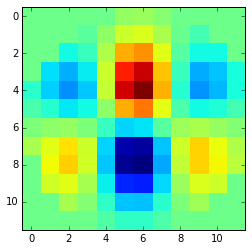

11


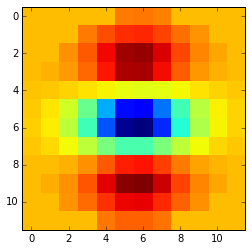

12


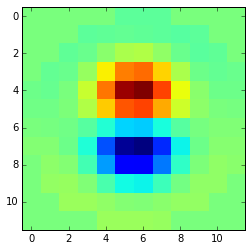

13


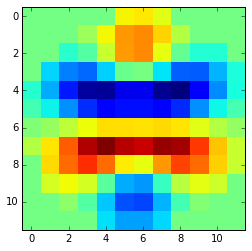

14


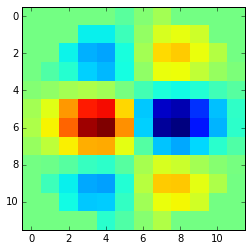

15


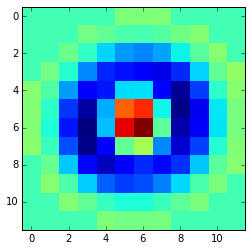

16


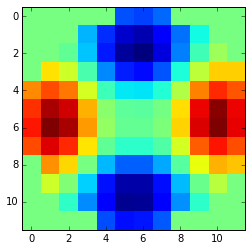

17


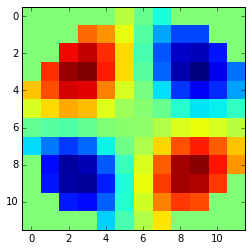

18


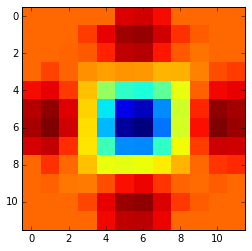

19


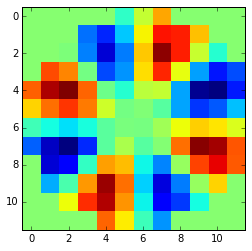

20


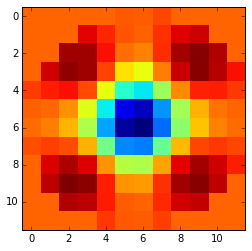

In [24]:
for i in range(21):
    print i
    img = fits[2].read()[i]
    plt.imshow(img)
    plt.show()

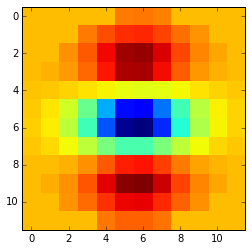

-13417.5596218
1723.06359559
-93.1774973737


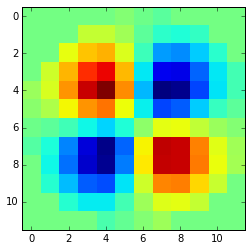

-740.77407074
976.992160454
-5.14426438014


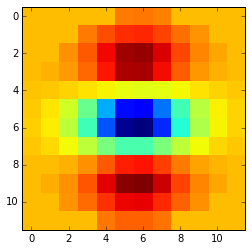

-13417.5596218
1723.06359559
-93.1774973737


In [26]:
#test if noisy partials are consisten with 0
img = fits[2].read()[11]
plt.imshow(img)
plt.show()
print img.sum()
print img.std()
print img.mean()
img = fits[2].read()[7]
plt.imshow(img)
plt.show()
print img.sum()
print img.std()
print img.mean()
img = fits[2].read()[11]
plt.imshow(img)
plt.show()
print img.sum()
print img.std()
print img.mean()

In [109]:
#header information, 
header = fits[0].read_header()
print header


SIMPLE  =                    T / conforms to FITS standard
BITPIX  =                  -32 / array data type
NAXIS   =                    2 / number of array dimensions
NAXIS1  =                  512
NAXIS2  =                  512
EXTEND  =                    T
NSLICES =                    6
PSF_SIGM=   0.6166557071664878
PSF_SIGP=   0.6166557071664878
PSF_HSM =   0.3458685398101807
URE_TIME=               6900.0
IGHTNESS=                 20.0
DIAMETER=    8.359999999999999
AIRMASS =                  1.2
RO_POINT=                 41.5
VEY_NAME= 'LSST    '
GE_WIDTH=                  512
TER_BAND= 'i       '
EL_SCALE=                  0.2
PSF_BETA=                  0.0
SHEAR_G2=                  0.0
PSF_FWHM=                 0.67
E_HEIGHT=                  512
IVE_AREA=               33.212
TINCTION=  0.07000000000000001
C_PSF_E1=                  0.0
SHEAR_G1=                  0.0
C_PSF_E2=                  0.0


732

In [110]:
#number of extensions including primary header and table 
len(fits) 

732

In [35]:
#invert a dictionary because we needed it. 
f = {'a':2, 'b':3}
g = {value:key for key,value in f.iteritems()}


print f.iteritems()
print g

<dictionary-itemiterator object at 0x10756f310>
{2: 'a', 3: 'b'}


In [8]:
%%bash
cd ..
cd descwl
ls

__init__.py
__init__.pyc
analysis.py
analysis.pyc
catalog.py
catalog.pyc
model.py
model.pyc
output.py
output.pyc
render.py
render.pyc
survey.py
survey.pyc
trace.py
trace.pyc


In [43]:
#the dictionary
import os
os.chdir('/Users/Ismael/code/research/WeakLensingDeblending/descwl/')
import render
dic = render.make_positions()
inv_dic = render.make_inv_positions()
for key in dic.keys():
    print key,dic[key]
    
print '\n'
   
for key in inv_dic.keys():
    print key,inv_dic[key]

('dy', 'dg1') 13
('dg2', 'dg2') 20
('dx', 'dy') 7
dx 1
('ds', 'dg1') 16
('dx', 'dx') 6
('dg1', 'dg2') 19
('dy', 'ds') 12
('dx', 'dg2') 10
('dy', 'dy') 11
('dx', 'dg1') 9
flux 0
dg2 5
dg1 4
('dx', 'ds') 8
dy 2
('dy', 'dg2') 14
('dg1', 'dg1') 18
ds 3
('ds', 'dg2') 17
('ds', 'ds') 15


0 flux
1 dx
2 dy
3 ds
4 dg1
5 dg2
6 ('dx', 'dx')
7 ('dx', 'dy')
8 ('dx', 'ds')
9 ('dx', 'dg1')
10 ('dx', 'dg2')
11 ('dy', 'dy')
12 ('dy', 'ds')
13 ('dy', 'dg1')
14 ('dy', 'dg2')
15 ('ds', 'ds')
16 ('ds', 'dg1')
17 ('ds', 'dg2')
18 ('dg1', 'dg1')
19 ('dg1', 'dg2')
20 ('dg2', 'dg2')
